In [2]:
from arpes.io import load_data
from arpes.plotting.annotations import annotate_cuts
import os.path

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-12-15_11-37-24.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [3]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = 'AN'
phi = 'P95'
energy = '*'
polarization = '*'
temp = 'LT'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_AN_P95_*_*_LT_*eVpass_000*.h5'

In [4]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

1


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_AN_P95_25eV_CIRCP_LT_5eVpass_0000.h5']

In [5]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

In [6]:
fs_data = load_data(file, location="ULTRA")

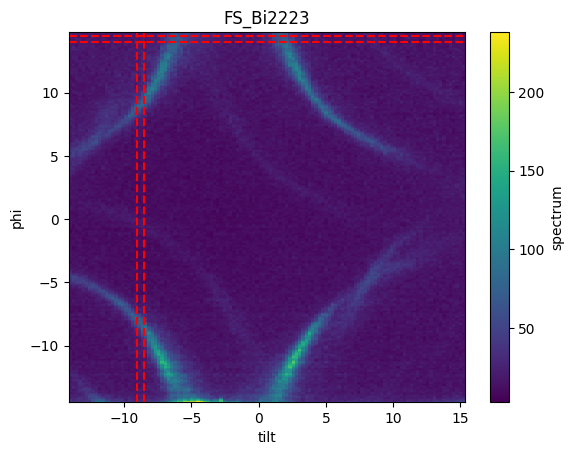

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fermi = fs_data.spectrum.sel(eV=slice(-0.02,0.02)).sum("eV").plot()
plt.axhline(y=14, xmin=0, xmax=1, color='red', linestyle='--')
plt.axhline(y=14.5, xmin=0, xmax=1, color='red', linestyle='--')
plt.axvline(x=-8.5, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-9, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('FS_Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/FS_Bi2223.png')

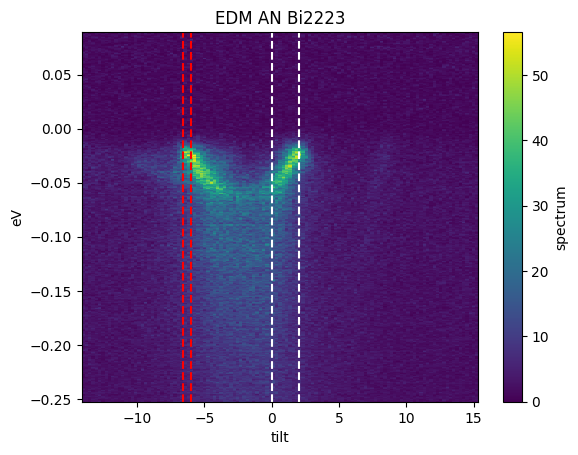

In [13]:
fig, ax = plt.subplots()

an_edm = fs_data.spectrum.sel(phi=slice(14,14.5)).sum("phi")
an_edm.plot()
plt.axvline(x=-6.6, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-6, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=0, ymin=0, ymax=1, color='white', linestyle='--')
plt.axvline(x=2, ymin=0, ymax=1, color='white', linestyle='--')
plt.title('EDM AN Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/EDM_AN_Bi2223.png')

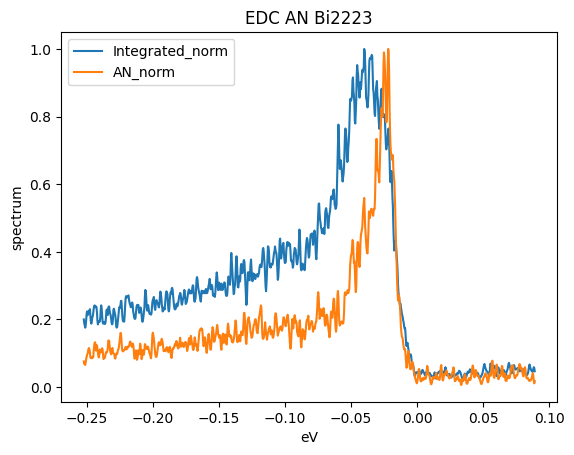

In [12]:
an_edc = fs_data.spectrum.sel(phi=slice(14,14.5), tilt=slice(-6.5,-6)).sum("phi").sum("tilt")
an_edc_integrated = fs_data.spectrum.sel(phi=slice(14,14.5), tilt=slice(0,2)).sum("phi").sum("tilt")
# an_edc.plot(label="AN")
# an_edc_integrated.plot(label="Integrated")
an_edc_integrated_norm = an_edc_integrated / max(an_edc_integrated)
an_edc_norm = an_edc / max(an_edc)
an_edc_integrated_norm.plot(label="Integrated_norm")
an_edc_norm.plot(label="AN_norm")
plt.legend()
plt.title('EDC AN Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/EDC_AN_Bi2223.png')

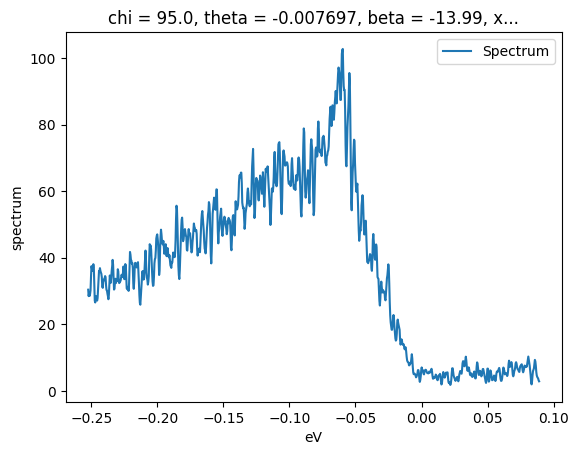

In [52]:
waterfall = fs_data.spectrum.sel(phi=slice(14,14.5), tilt=slice(-3,-2)).sum("phi").sum("tilt")
waterfall.plot(label="Spectrum")
plt.legend()
plt.show()

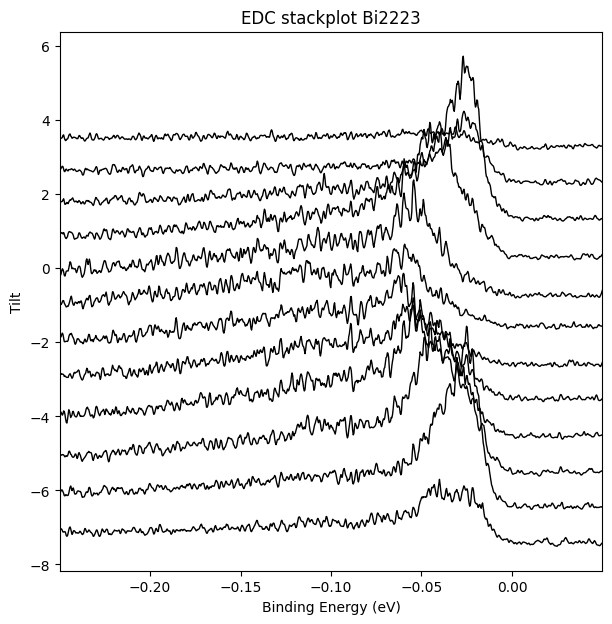

In [14]:
from arpes.plotting.stack_plot import stack_dispersion_plot

an_edm_parab = fs_data.spectrum.sel(phi=slice(14,14.5), tilt=slice(-7.5,5)).sum("phi")
fig, ax = stack_dispersion_plot(an_edm_parab.sel(eV=slice(-0.25,0.05)),stack_axis='tilt', scale_factor=5, use_constant_correction=True,correction_side='right', max_stacks=13)
plt.title('EDC stackplot Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/EDC_stackplot_Bi2223.png')

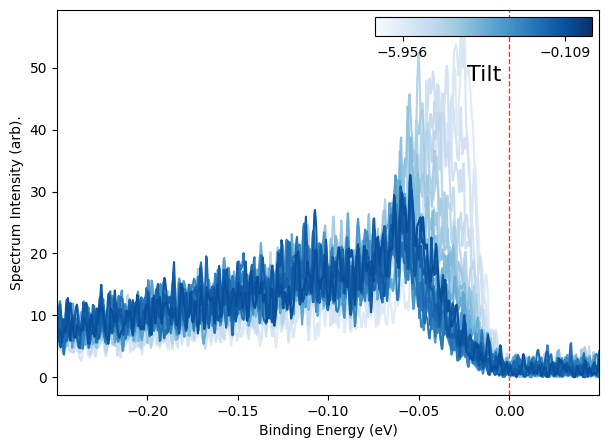

In [70]:
from arpes.plotting.stack_plot import flat_stack_plot, overlapped_stack_dispersion_plot

an_edm_parab = fs_data.spectrum.sel(phi=slice(14,14.5), tilt=slice(-6,0)).sum("phi")

# fig, ax = plt.subplots()
# inset = inset_axes(ax, loc='upper', height='5%', width='40%')

# cbarmap = tilt_colorbar(high=150, ax=inset), tilt_colorbar(high=150)
fig, ax = flat_stack_plot(an_edm_parab.sel(eV=slice(-0.25,0.05)), stack_axis='tilt')

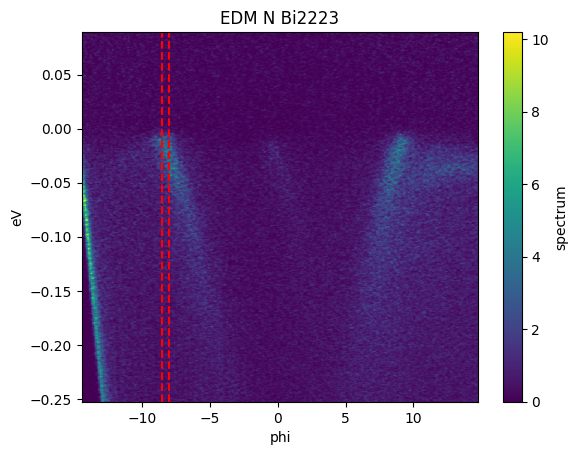

In [15]:
n_edm = fs_data.spectrum.sel(tilt=slice(-9,-8.5)).sum("tilt")
n_edm.plot()
plt.axvline(x=-8.5, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=-8, ymin=0, ymax=1, color='red', linestyle='--')
plt.title('EDM N Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/EDM_N_Bi2223.png')

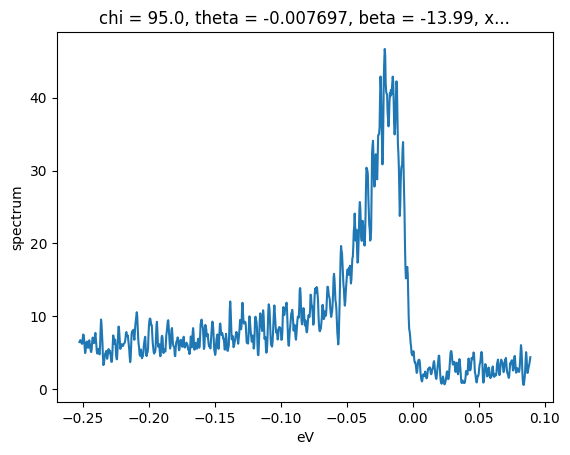

In [17]:
n_edc = fs_data.spectrum.sel(phi=slice(-8.5,-8), tilt=slice(-9,-8.5)).sum("phi").sum("tilt")
n_edc.plot()

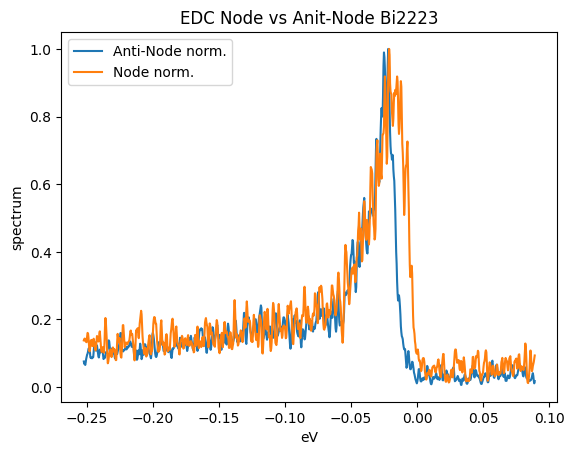

In [18]:
an_norm = an_edc/max(an_edc)
n_norm = n_edc/max(n_edc)
# an_edc_integrated_norm = an_edc_integrated/max(an_edc_integrated)
an_norm.plot(label="Anti-Node norm.")
# an_edc_integrated_norm.plot(label="AN Integrated")
n_norm.plot(label="Node norm.")
plt.legend()
# n_edc.plot()
plt.title('EDC Node vs Anit-Node Bi2223')
plt.savefig('Plots/Bi2223_EDC_analysis/EDC_N_AN_comp_Bi2223.png')